<h1 align="center">IRIS FLOWER CLASSIFICATION</h1>
<h3 align="center">Shreyas Naik</h3>

1. Importing the required libraries and the required dataset
2. Data Exploration and Preprocessing
3. Data Preparation
4. Model Building
5. Saving the Model

## Importing the required libraries and the required dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [4]:
iris_df = pd.read_csv('C:/Users/naiks/Downloads/IRIS.csv')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Data Exploration and Preprocessing

In [7]:
print("\nDataset information:")
print(iris_df.info())

print("\nSummary statistics of the dataset:")
print(iris_df.describe())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary statistics of the dataset:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


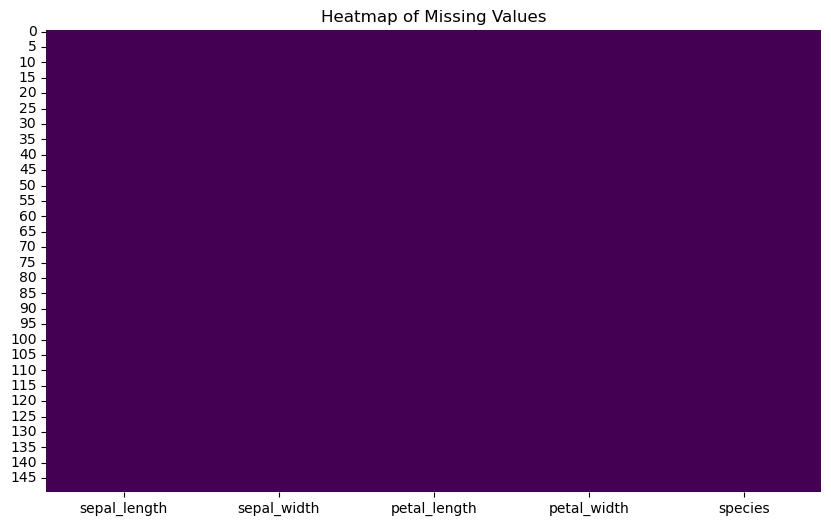

In [25]:
# Check for missing values
missing_values = iris_df.isnull().sum()
print(missing_values)

# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(iris_df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

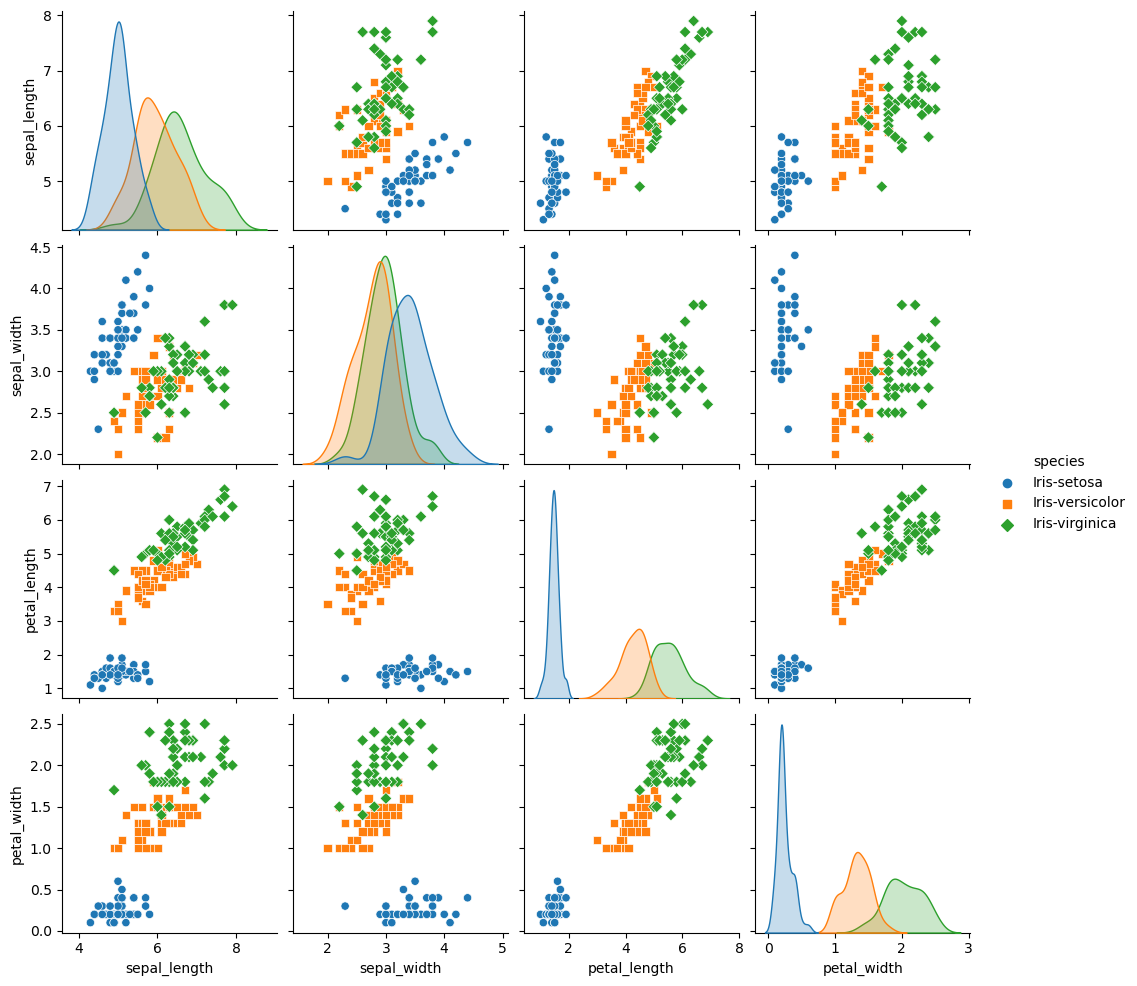

In [8]:
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.show()

C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


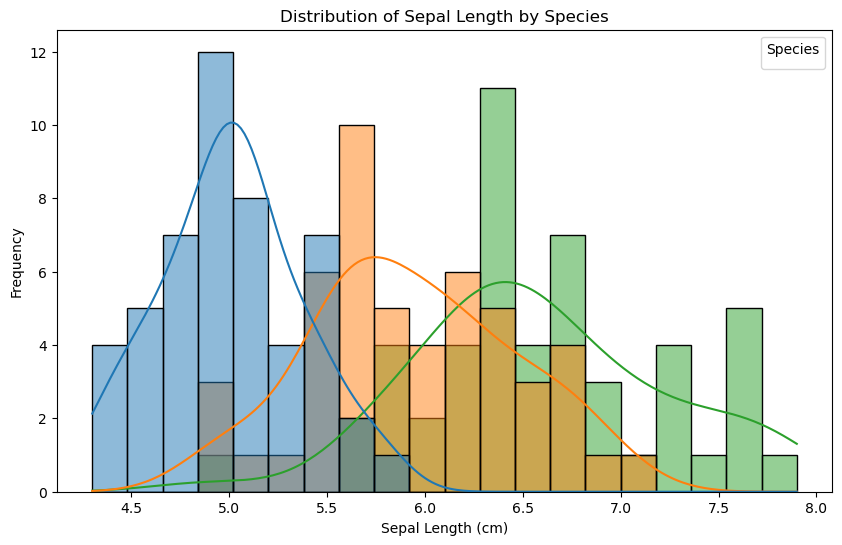

In [9]:
# Distribution of Sepal Length by Species
plt.figure(figsize=(10, 6))
sns.histplot(data=iris_df, x='sepal_length', hue='species', kde=True, bins=20)
plt.title('Distribution of Sepal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.legend(title='Species')
plt.show()

C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


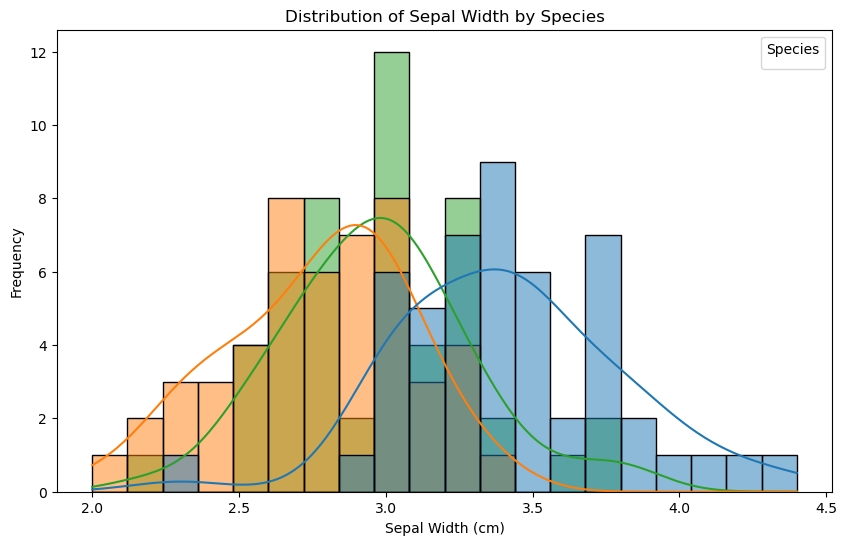

In [10]:
# Distribution of Sepal Width by Species
plt.figure(figsize=(10, 6))
sns.histplot(data=iris_df, x='sepal_width', hue='species', kde=True, bins=20)
plt.title('Distribution of Sepal Width by Species')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.legend(title='Species')
plt.show()

C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


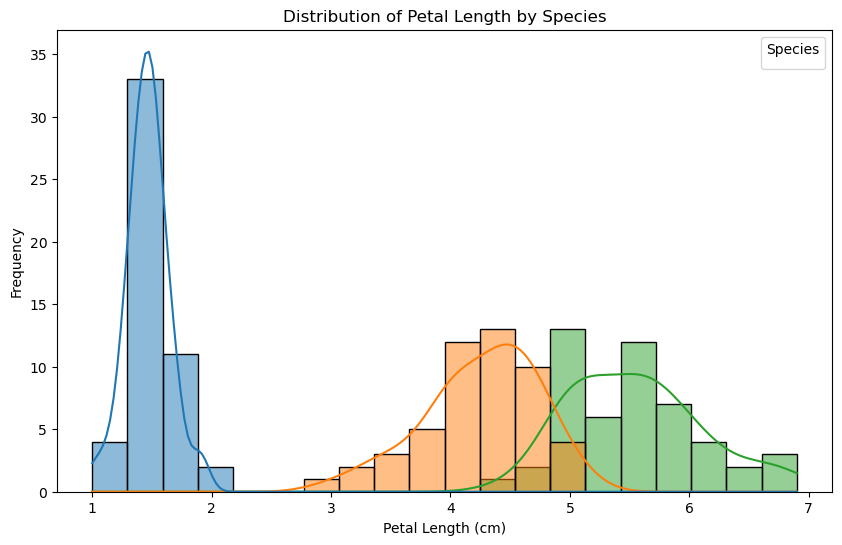

In [11]:
# Distribution of Petal Length by Species
plt.figure(figsize=(10, 6))
sns.histplot(data=iris_df, x='petal_length', hue='species', kde=True, bins=20)
plt.title('Distribution of Petal Length by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.legend(title='Species')
plt.show()

C:\Users\naiks\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


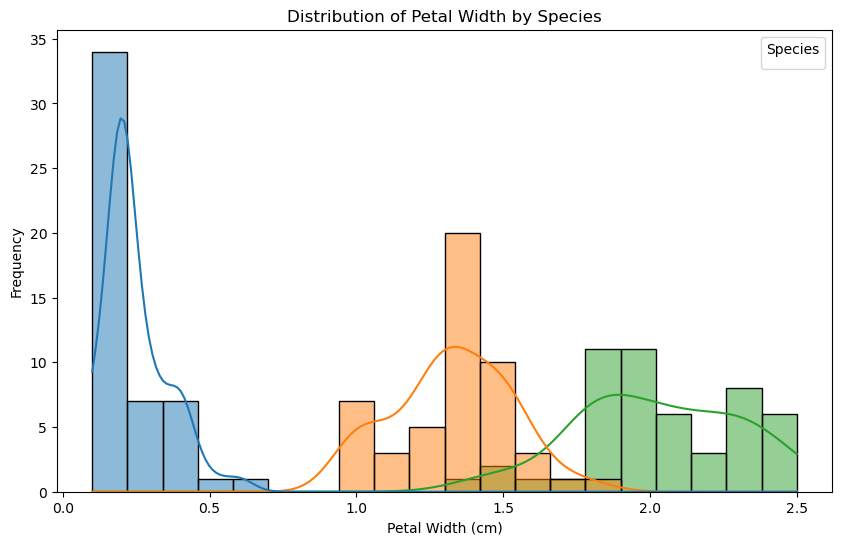

In [12]:
# Distribution of Petal Width by Species
plt.figure(figsize=(10, 6))
sns.histplot(data=iris_df, x='petal_width', hue='species', kde=True, bins=20)
plt.title('Distribution of Petal Width by Species')
plt.xlabel('Petal Width (cm)')
plt.ylabel('Frequency')
plt.legend(title='Species')
plt.show()

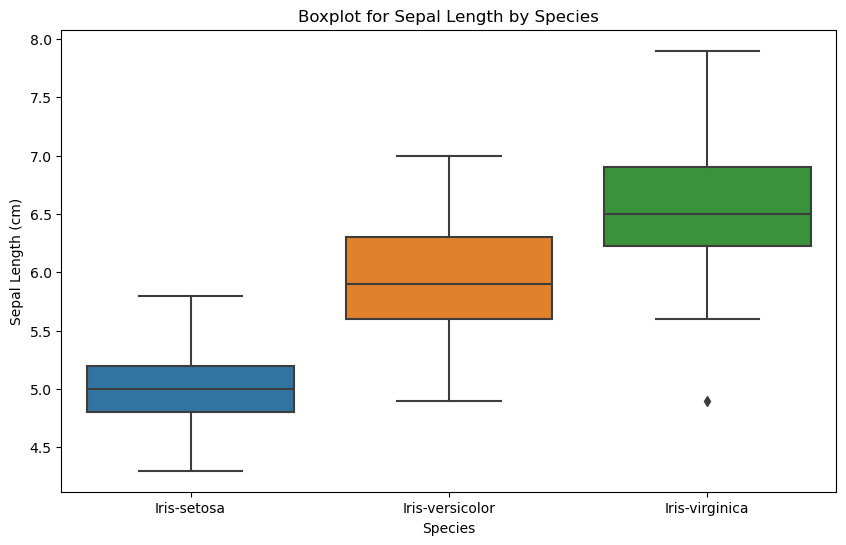

In [13]:
# Boxplot for Sepal Length by Species
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='species', y='sepal_length')
plt.title('Boxplot for Sepal Length by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.show()

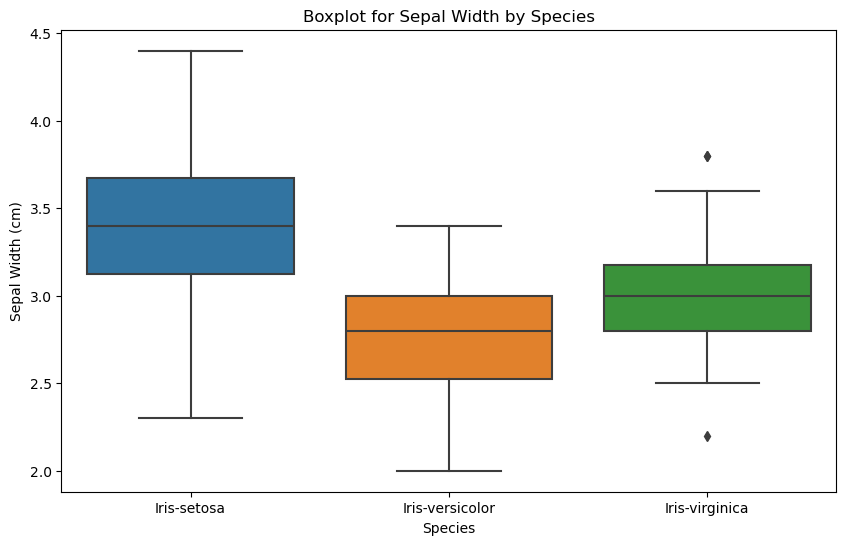

In [14]:
# Boxplot for Sepal Width by Species
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='species', y='sepal_width')
plt.title('Boxplot for Sepal Width by Species')
plt.xlabel('Species')
plt.ylabel('Sepal Width (cm)')
plt.show()

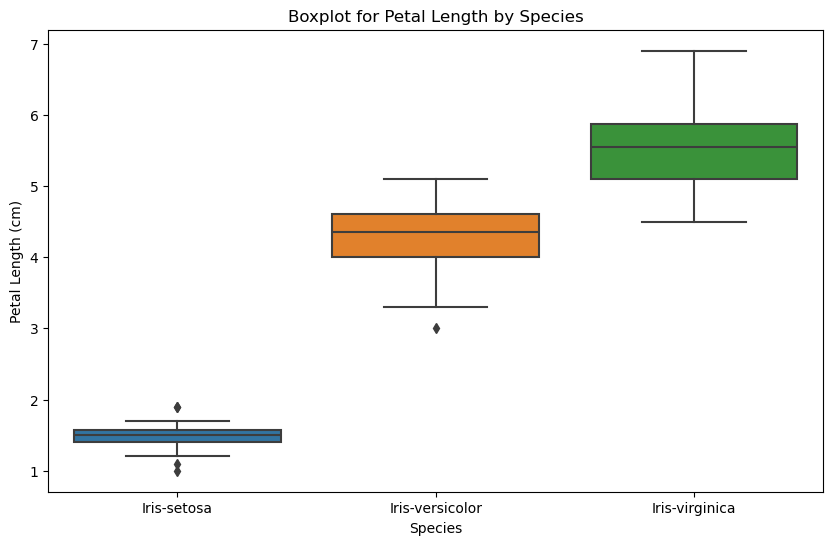

In [15]:
# Boxplot for Petal Length by Species
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='species', y='petal_length')
plt.title('Boxplot for Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.show()

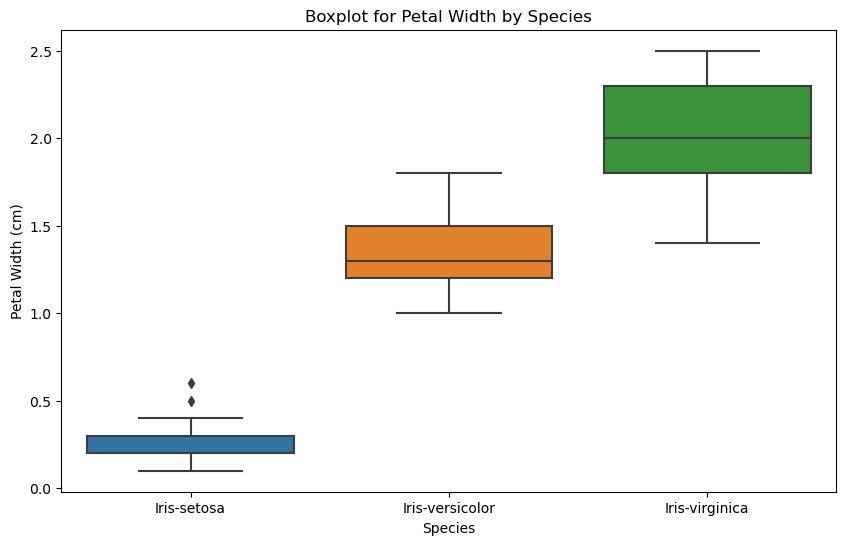

In [16]:
# Boxplot for Petal Width by Species
plt.figure(figsize=(10, 6))
sns.boxplot(data=iris_df, x='species', y='petal_width')
plt.title('Boxplot for Petal Width by Species')
plt.xlabel('Species')
plt.ylabel('Petal Width (cm)')
plt.show()

## Data Preparation

In [17]:
# Split the dataset into features (X) and target (y)
X = iris_df.drop('species', axis=1)
y = iris_df['species']

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Define a pipeline for preprocessing and modeling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', None)
])

## Model Building

In [20]:
# Define parameters for grid search
param_grid = [
    {'classifier': [LogisticRegression()], 'classifier__solver': ['liblinear', 'saga'], 'classifier__C': np.logspace(-3, 3, 7)},
    {'classifier': [DecisionTreeClassifier()], 'classifier__max_depth': [None, 3, 5, 7]},
    {'classifier': [RandomForestClassifier()], 'classifier__n_estimators': [10, 50, 100, 200]},
    {'classifier': [SVC()], 'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'classifier__C': [0.1, 1, 10]},
    {'classifier': [KNeighborsClassifier()], 'classifier__n_neighbors': range(1, 11)},
    {'classifier': [GaussianNB()]}
]

In [21]:
# Perform grid search to find the best model
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


C:\Users\naiks\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\naiks\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\naiks\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\naiks\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\naiks\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\naiks\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', None)]),
             param_grid=[{'classifier': [LogisticRegression(C=10.0,
                                                            solver='saga')],
                          'classifier__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'classifier__solver': ['liblinear', 'saga']},
                         {'classifier': [DecisionTreeClassifier()],
                          'classifier__max_depth': [None, 3, 5, 7]},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__n_estimators': [10, 50, 100, 200]},
                         {'classifier': [SVC()], 'classifier__C': [0.1, 1, 10],
                          'classifier__kernel': ['linear', 'poly', 'rbf',
                                                 'sigmoid']},
                         {'classifier': [KNeighborsClassifier()],
                          'classifier__n_neighbors': range(1, 11)},
                         {'classifier': [GaussianNB()]}],
             scoring='accuracy', verbose=1)

In [22]:
# Get the best model from grid search
best_model = grid_search.best_estimator_

In [23]:
# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nBest Model Performance:")
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Model Performance:
Accuracy: 1.0

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



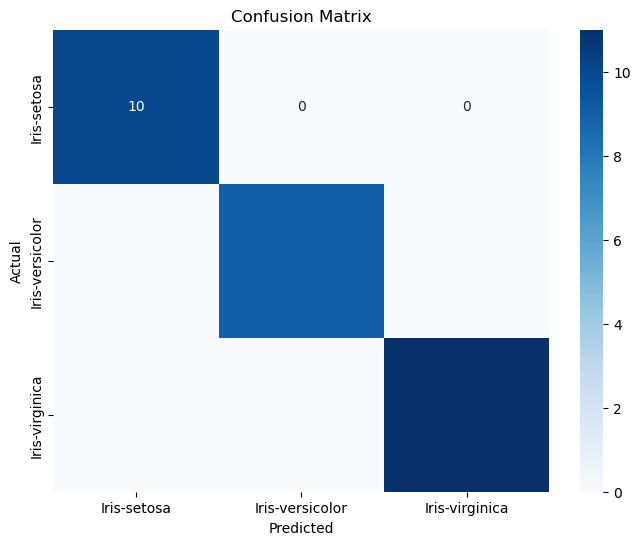

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=iris_df['species'].unique(), yticklabels=iris_df['species'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Saving the model

In [27]:
import pickle

# File path where you want to save the model
model_filename = 'iris_model.pkl'

# Save the model to a file
with open(model_filename, 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved successfully as", model_filename)

Model saved successfully as iris_model.pkl
